## AUDIENCE ACTIVITY - A STUDY ON HOW THE TIME OF DAY AFFECTS POST ENGAGEMENT 

 This project aims to determine what kind of posts are more popular and get more interaction. It also determines what time of the day is the best time to post. I  used visualizations to show variation in post comments with the time of day. 

Hacker News is my case-study news site.

Hacker News is a site started by the startup incubator Y Combinator, where user-submitted stories (known as "posts") are voted and commented upon, similar to reddit. Hacker News is extremely popular in technology and startup circles, and posts that make it to the top of Hacker News' listings can get hundreds of thousands of visitors as a result.

#### DATASET DESCRIPTION
* id: The unique identifier from Hacker News for the post
* title: The title of the post
* url: The URL that the posts links to, if it the post has a URL
* num_points: The number of points the post acquired, calculated as the total * * number of upvotes minus the total number of downvotes
* num_comments: The number of comments that were made on the post
* author: The username of the person who submitted the post
* created_at: The date and time at which the post was submitted

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from datetime import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

### DATA EXPLORATION AND CLEANING

In [2]:
# Read in the data
hn = pd.read_csv("hn_posts.csv")
hn.head()

,id,title,url,num_points,num_comments,author,created_at
0,12579008,You have two days to comment if you want stem ...,http://www.regulations.gov/document?D=FDA-2015...,1,0,altstar,9/26/2016 3:26
1,12579005,SQLAR the SQLite Archiver,https://www.sqlite.org/sqlar/doc/trunk/README.md,1,0,blacksqr,9/26/2016 3:24
2,12578997,What if we just printed a flatscreen televisio...,https://medium.com/vanmoof/our-secrets-out-f21...,1,0,pavel_lishin,9/26/2016 3:19
3,12578989,algorithmic music,http://cacm.acm.org/magazines/2011/7/109891-al...,1,0,poindontcare,9/26/2016 3:16
4,12578979,How the Data Vault Enables the Next-Gen Data W...,https://www.talend.com/blog/2016/05/12/talend-...,1,0,markgainor1,9/26/2016 3:14


In [3]:
# get data summary
hn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293119 entries, 0 to 293118
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            293119 non-null  int64 
 1   title         293119 non-null  object
 2   url           279256 non-null  object
 3   num_points    293119 non-null  int64 
 4   num_comments  293119 non-null  int64 
 5   author        293119 non-null  object
 6   created_at    293119 non-null  object
dtypes: int64(3), object(4)
memory usage: 15.7+ MB


In [4]:
# Explore the author column
hn["author"].value_counts()

jonbaer        2731
ingve          2487
prostoalex     1656
dnetesn        1517
jseliger       1382
               ... 
stopman           1
TriNetra          1
vkefallinos       1
katopz            1
phatbyte          1
Name: author, Length: 51900, dtype: int64

In [5]:
# Fill in blank fields in url column
hn["url"] = hn["url"].fillna("no url")

In [6]:
hn["url"].isnull().sum()

0

In [7]:
# Get statistical summary of data 
hn.describe()

,id,num_points,num_comments
count,2.931190e+05,293119.000000,293119.000000
mean,1.133046e+07,15.025324,6.525544
std,6.961055e+05,58.504103,30.376319
min,1.017690e+07,1.000000,0.000000
25%,1.071636e+07,1.000000,0.000000
50%,1.130303e+07,2.000000,0.000000
75%,1.193152e+07,4.000000,1.000000
max,1.257901e+07,5771.000000,2531.000000


The average number of comments per post is 7.

The highest number of comments on a post is: 2531

In [8]:
# Print out the title with the highest comments
print("Post with the highest number of comments:")
hn["title"][hn["num_comments"] == 2531].iloc[0]

Post with the highest number of comments:


'UK votes to leave EU'

In [9]:
# Convert 'created_at' column to datetime format
hn["created_at"] = pd.to_datetime(hn["created_at"])

In [10]:
hn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293119 entries, 0 to 293118
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            293119 non-null  int64         
 1   title         293119 non-null  object        
 2   url           293119 non-null  object        
 3   num_points    293119 non-null  int64         
 4   num_comments  293119 non-null  int64         
 5   author        293119 non-null  object        
 6   created_at    293119 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 15.7+ MB


In [11]:
# Show first 5 rows 
hn.head()

,id,title,url,num_points,num_comments,author,created_at
0,12579008,You have two days to comment if you want stem ...,http://www.regulations.gov/document?D=FDA-2015...,1,0,altstar,2016-09-26 03:26:00
1,12579005,SQLAR the SQLite Archiver,https://www.sqlite.org/sqlar/doc/trunk/README.md,1,0,blacksqr,2016-09-26 03:24:00
2,12578997,What if we just printed a flatscreen televisio...,https://medium.com/vanmoof/our-secrets-out-f21...,1,0,pavel_lishin,2016-09-26 03:19:00
3,12578989,algorithmic music,http://cacm.acm.org/magazines/2011/7/109891-al...,1,0,poindontcare,2016-09-26 03:16:00
4,12578979,How the Data Vault Enables the Next-Gen Data W...,https://www.talend.com/blog/2016/05/12/talend-...,1,0,markgainor1,2016-09-26 03:14:00


In [12]:
# Show statistical summary of the 'created_at' column
hn[["created_at"]].describe()

,created_at
count,293119
unique,215563
top,2016-04-09 22:40:00
freq,11
first,2015-09-06 05:50:00
last,2016-09-26 03:26:00


### EXTRACTION OF THE HOUR EACH POST WAS CREATED 

In [13]:
# Initialise empty lists
title = hn["title"]
ask_posts = []
show_posts = []
other_posts = []

In [14]:
# Separate posts based on what kind they are; ask, show or regular posts
for row in hn.index:
    if title.loc[row].lower().startswith("ask hn"):
        ask_posts.append(hn.loc[row])
    elif title.loc[row].lower().startswith("show hn"):
        show_posts.append(hn.loc[row])
    else:
        other_posts.append(hn.loc[row])

In [15]:
# Convert lists to dataframes
ask_df = pd.DataFrame(ask_posts)
show_df = pd.DataFrame(show_posts)
others_df = pd.DataFrame(other_posts)

In [16]:
# Create function to extract the hour from a datetime column
def extract_hour(df, col):
    
    hour_created = [created_time.hour for created_time in df[col]]
    hour_created = [dt.strptime(str(i), "%H").strftime("%H") for i in hour_created]
    
    return hour_created

In [17]:
# Create new columns containing only the hour of the day
ask_df["created_hour"] = extract_hour(ask_df, "created_at")
show_df["created_hour"] = extract_hour(show_df, "created_at")
others_df["created_hour"] = extract_hour(others_df, "created_at")

In [18]:
ask_df.head()

,id,title,url,num_points,num_comments,author,created_at,created_hour
10,12578908,Ask HN: What TLD do you use for local developm...,no url,4,7,Sevrene,2016-09-26 02:53:00,02
42,12578522,Ask HN: How do you pass on your work when you ...,no url,6,3,PascLeRasc,2016-09-26 01:17:00,01
76,12577908,Ask HN: How a DNS problem can be limited to a ...,no url,1,0,kuon,2016-09-25 22:57:00,22
80,12577870,Ask HN: Why join a fund when you can be an angel?,no url,1,3,anthony_james,2016-09-25 22:48:00,22
102,12577647,Ask HN: Someone uses stock trading as passive ...,no url,5,2,00taffe,2016-09-25 21:50:00,21


In [19]:
show_df.head()

,id,title,url,num_points,num_comments,author,created_at,created_hour
52,12578335,Show HN: Finding puns computationally,http://puns.samueltaylor.org/,2,0,saamm,2016-09-26 00:36:00,00
58,12578182,Show HN: A simple library for complicated anim...,https://christinecha.github.io/choreographer-js/,1,0,christinecha,2016-09-26 00:01:00,00
64,12578098,Show HN: WebGL visualization of DNA sequences,http://grondilu.github.io/dna.html,1,0,grondilu,2016-09-25 23:44:00,23
70,12577991,"Show HN: Pomodoro-centric, heirarchical projec...",https://github.com/jakebian/zeal,2,0,dbranes,2016-09-25 23:17:00,23
140,12577142,Show HN: Jumble Essays on the go #PaulInYourP...,https://itunes.apple.com/us/app/jumble-find-st...,1,1,ryderj,2016-09-25 20:06:00,20


In [20]:
others_df.head()

,id,title,url,num_points,num_comments,author,created_at,created_hour
0,12579008,You have two days to comment if you want stem ...,http://www.regulations.gov/document?D=FDA-2015...,1,0,altstar,2016-09-26 03:26:00,03
1,12579005,SQLAR the SQLite Archiver,https://www.sqlite.org/sqlar/doc/trunk/README.md,1,0,blacksqr,2016-09-26 03:24:00,03
2,12578997,What if we just printed a flatscreen televisio...,https://medium.com/vanmoof/our-secrets-out-f21...,1,0,pavel_lishin,2016-09-26 03:19:00,03
3,12578989,algorithmic music,http://cacm.acm.org/magazines/2011/7/109891-al...,1,0,poindontcare,2016-09-26 03:16:00,03
4,12578979,How the Data Vault Enables the Next-Gen Data W...,https://www.talend.com/blog/2016/05/12/talend-...,1,0,markgainor1,2016-09-26 03:14:00,03


In [21]:
# Calculate total comments of the three kinds of posts
ask_comments = ask_df["num_comments"].sum()
show_comments = show_df["num_comments"].sum()
others_comments = others_df["num_comments"].sum()

# Calculate total comments of all posts
total_comments = hn["num_comments"].sum()

### VISUALISATION

In [22]:
# Set plot style and figure size
sns.set(style="whitegrid", rc={"figure.figsize":(15, 8)})

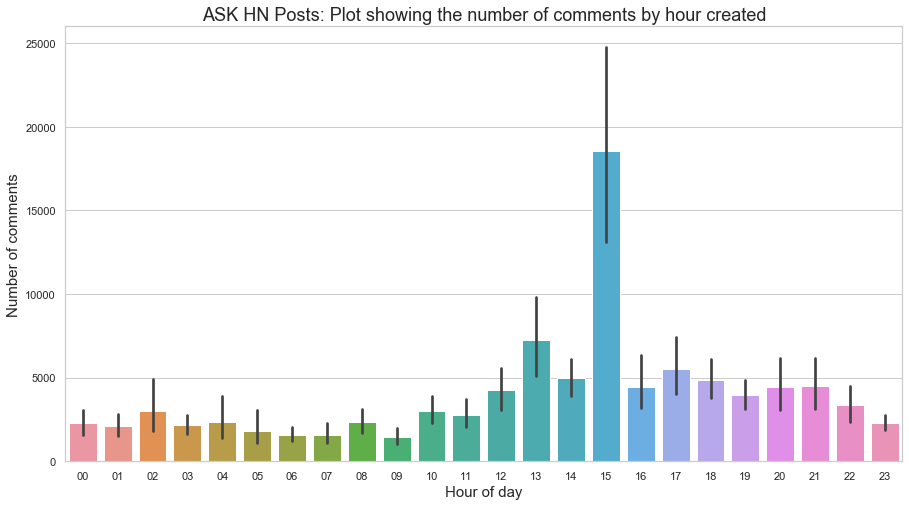

In [23]:
# Plot total comments against hour of day
sns.barplot(x="created_hour", y="num_comments", data=ask_df,  orient="v", estimator=sum)

plt.title("ASK HN Posts: Plot showing the number of comments by hour created", fontsize=18)      # Plot title
plt.xlabel("Hour of day", fontsize=15)                                                           # Label x-axis
plt.ylabel("Number of comments", fontsize=15);                                                   # label y-axis

In [24]:
print(f"Percentage of Ask HN posts: {(len(ask_df) / len(hn)) * 100}")                       
print(f"Percentage of Ask HN comments: {(ask_comments / total_comments) * 100}")
print(f"The time of day with the most comments: 15:00 Eastern time == 21:00 in Ngeria")

Percentage of Ask HN posts: 3.117846335447378
Percentage of Ask HN comments: 4.965910534562342
The time of day with the most comments: 15:00 Eastern time == 21:00 in Ngeria


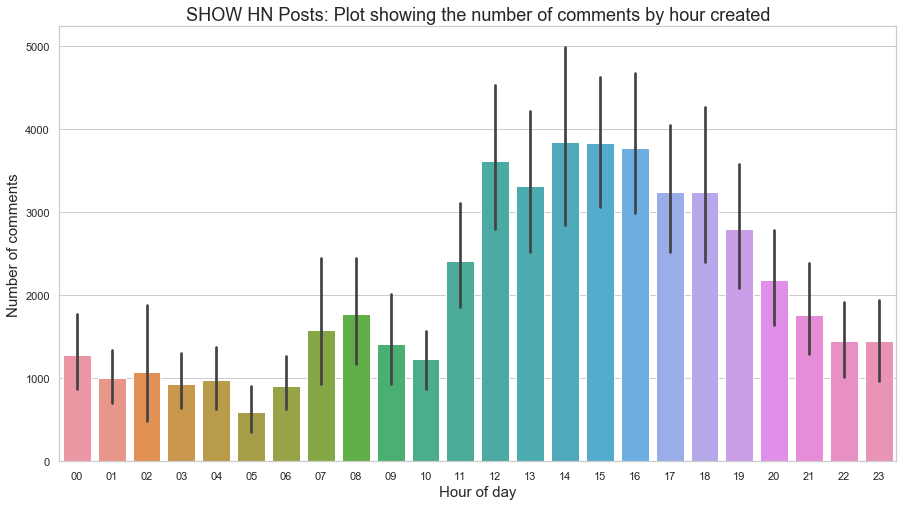

In [25]:
# Plot total comments against hour of day
sns.barplot(x="created_hour", y="num_comments", data=show_df,  orient="v", estimator=sum)

plt.title("SHOW HN Posts: Plot showing the number of comments by hour created", fontsize=18)       # Plot title
plt.xlabel("Hour of day", fontsize=15)                                                             # Label x-axis
plt.ylabel("Number of comments", fontsize=15);                                                     # Label y-axis

In [26]:
print(f"Percentage of Show HN posts: {(len(show_df) / len(hn))*100}")
print(f"Percentage of Show HN comments: {(show_comments / total_comments) * 100}")
print(f"The time of day with the most comments: 14:00 == 20:00 Nigerian time")

Percentage of Show HN posts: 3.4654867135873144
Percentage of Show HN comments: 2.594835423767005
The time of day with the most comments: 14:00 == 20:00 Nigerian time


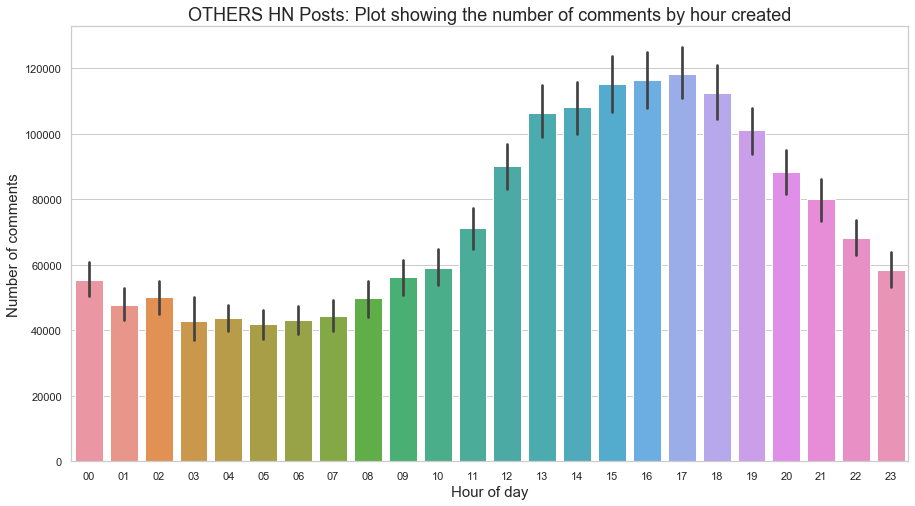

In [27]:
# Plot total comments against hour of day
sns.barplot(x="created_hour", y="num_comments", data=others_df,  orient="v", estimator=sum)

plt.title("OTHERS HN Posts: Plot showing the number of comments by hour created", fontsize=18)     # Plot title
plt.xlabel("Hour of day", fontsize=15)                                                             # Label x-axis
plt.ylabel("Number of comments", fontsize=15);                                                     # Label y-axis

#### CONCLUSION

I compared Ask HN and Show HN posts and found:
 * Though Show HN posts were more than Ask HN posts, Ask HN posts receive more activity than Show HN posts. This may because these posts ask questions. Questions attract answers in form of comments on the Hacker News platform
 * Ask HN posts get more activity  at 15:00 Eastern time
 * Show HN posts get more activity  at 16:00 Eastern time

I found that peak time for ordinary posts (i.e not Ask HN or Show HN) is between 12:00 to 20:00 Eastern time and that these posts receive less activity in the early hours of the day.